In [1]:
import scipy.io

# Load the .mat file
mat_file = "water_dataset.mat"  # Replace with your file path
data = scipy.io.loadmat(mat_file)

# Print all the keys in the .mat file
print("Keys in the .mat file:", data.keys())



Keys in the .mat file: dict_keys(['__header__', '__version__', '__globals__', 'X_tr', 'X_te', 'Y_tr', 'Y_te', 'location_group', 'features', 'location_ids'])


In [2]:
# If 'features' is present in your .mat file data
features = data['features'][0]  # Extract feature names
features_list = [feature[0] for feature in features]  # Convert to a Python list
print("Features in the dataset:")
print(features_list)


Features in the dataset:
['Specific conductance, water, unfiltered, microsiemens per centimeter at 25 degrees Celsius (Maximum)', 'pH, water, unfiltered, field, standard units (Maximum)', 'pH, water, unfiltered, field, standard units (Minimum)', 'Specific conductance, water, unfiltered, microsiemens per centimeter at 25 degrees Celsius (Minimum)', 'Specific conductance, water, unfiltered, microsiemens per centimeter at 25 degrees Celsius (Mean)', 'Dissolved oxygen, water, unfiltered, milligrams per liter (Maximum)', 'Dissolved oxygen, water, unfiltered, milligrams per liter (Mean)', 'Dissolved oxygen, water, unfiltered, milligrams per liter (Minimum)', 'Temperature, water, degrees Celsius (Mean)', 'Temperature, water, degrees Celsius (Minimum)', 'Temperature, water, degrees Celsius (Maximum)']


In [3]:
import scipy.io
import pandas as pd
import numpy as np

# Load the .mat file
mat_file = "water_dataset.mat"  # Replace with your file path
data = scipy.io.loadmat(mat_file)

# Extract feature names
features = [f[0] for f in data['features'][0]]  # Convert MATLAB cell array to list

# Extract location IDs
location_ids = data['location_ids'].flatten()  # Convert to 1D array

# Extract training input data (X_tr) and output data (Y_tr)
X_tr = np.vstack(data['X_tr'][0])  # Combine all matrices into a single 2D array
Y_tr = data['Y_tr']  # Training output data

# Extract test input data (X_te) and output data (Y_te)
X_te = np.vstack(data['X_te'][0])  # Combine all matrices into a single 2D array
Y_te = data['Y_te']  # Test output data

# Save training data to CSV
train_df = pd.DataFrame(X_tr, columns=features)  # Add feature names as columns
train_df['location_id'] = np.repeat(location_ids, X_tr.shape[0] // len(location_ids))
train_df.to_csv("training_input.csv", index=False)

train_output_df = pd.DataFrame(Y_tr)
train_output_df['location_id'] = location_ids
train_output_df.to_csv("training_output.csv", index=False)

# Save test data to CSV
test_df = pd.DataFrame(X_te, columns=features)  # Add feature names as columns
test_df['location_id'] = np.repeat(location_ids, X_te.shape[0] // len(location_ids))
test_df.to_csv("test_input.csv", index=False)

test_output_df = pd.DataFrame(Y_te)
test_output_df['location_id'] = location_ids
test_output_df.to_csv("test_output.csv", index=False)

print("Data successfully saved to CSV files.")


Data successfully saved to CSV files.


In [4]:
print(f"X_tr shape: {X_tr.shape}")  # Should be (423, 37, 11)
print(f"Y_tr shape: {Y_tr.shape}")  # Should be (423, 37)
print(f"X_te shape: {X_te.shape}")  # Should be (282, 37, 11)
print(f"Y_te shape: {Y_te.shape}")  # Should be (282, 37)


X_tr shape: (15651, 11)
Y_tr shape: (37, 423)
X_te shape: (10434, 11)
Y_te shape: (37, 282)


In [5]:
# Check the first element of X_tr
print(f"First element type: {type(X_tr[0])}")
print(f"First element shape: {X_tr[0].shape}")  # Should be (37, 11)


First element type: <class 'numpy.ndarray'>
First element shape: (11,)


In [6]:
## Extract training and test input data as 3D arrays
X_tr = np.stack(data['X_tr'][0], axis=0)  # Shape: (423, 37, 11)
X_te = np.stack(data['X_te'][0], axis=0)  # Shape: (282, 37, 11)

# Check shapes
print("X_tr shape:", X_tr.shape)  # Should be (423, 37, 11)
print("X_te shape:", X_te.shape)  # Should be (282, 37, 11)


X_tr shape: (423, 37, 11)
X_te shape: (282, 37, 11)


In [7]:
# Transpose and flatten Y_tr and Y_te
Y_tr_flattened = Y_tr.T.flatten()  # Transpose to align time (423) with rows, then flatten
Y_te_flattened = Y_te.T.flatten()  # Transpose to align time (282) with rows, then flatten

# Check the shapes after flattening
print("Flattened Y_tr shape:", Y_tr_flattened.shape)  # Should match X_tr rows (15651)
print("Flattened Y_te shape:", Y_te_flattened.shape)  # Should match X_te rows (10434)


Flattened Y_tr shape: (15651,)
Flattened Y_te shape: (10434,)


In [8]:
# Correct stacking of X_tr and X_te
X_tr_stacked = np.stack(X_tr, axis=0)  # Combine time steps into a 3D array (423, 37, 11)
X_te_stacked = np.stack(X_te, axis=0)  # Combine time steps into a 3D array (282, 37, 11)

print("Corrected X_tr_stacked shape:", X_tr_stacked.shape)
print("Corrected X_te_stacked shape:", X_te_stacked.shape)


Corrected X_tr_stacked shape: (423, 37, 11)
Corrected X_te_stacked shape: (282, 37, 11)


In [9]:
# Transpose Y_tr and Y_te
Y_tr_transposed = Y_tr.T  # Shape: (423, 37)
Y_te_transposed = Y_te.T  # Shape: (282, 37)

# Compute average pH for each time step
y_train = Y_tr_transposed.mean(axis=1)  # Shape: (423,)
y_test = Y_te_transposed.mean(axis=1)  # Shape: (282,)


In [10]:
# Correctly flatten spatial and feature dimensions
X_train_flat = X_tr_stacked.reshape(X_tr_stacked.shape[0], -1)  # Shape: (423, 37*11)
X_test_flat = X_te_stacked.reshape(X_te_stacked.shape[0], -1)  # Shape: (282, 37*11)

# Verify the shapes
print("Correct X_train_flat shape:", X_train_flat.shape)  # Should be (423, 407)
print("Correct X_test_flat shape:", X_test_flat.shape)    # Should be (282, 407)


Correct X_train_flat shape: (423, 407)
Correct X_test_flat shape: (282, 407)


In [11]:
from sklearn.preprocessing import StandardScaler

# Standardize input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)


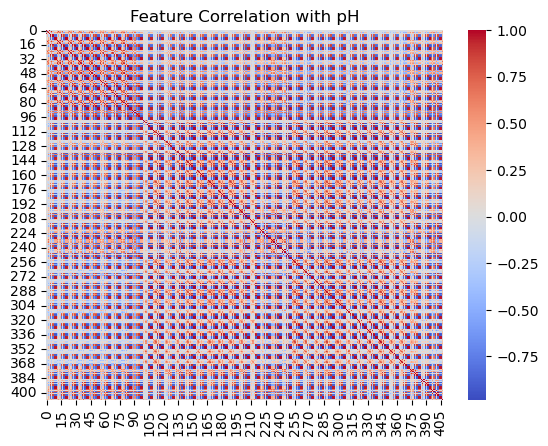

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Combine X_train_flat and y_train into a DataFrame
X_train_df = pd.DataFrame(X_train_flat)
X_train_df['pH'] = y_train

# Calculate correlations
correlation_matrix = X_train_df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Feature Correlation with pH")
plt.show()


In [13]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

y_pred_ridge = ridge_model.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression - MSE: {mse_ridge}, R^2: {r2_ridge}")


Ridge Regression - MSE: 1.2314613440510751e-05, R^2: 0.7011400500424273


In [14]:
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

y_pred_linear = linear_model.predict(X_test_scaled)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression - MSE: {mse_linear}, R^2: {r2_linear}")


Linear Regression - MSE: 0.00013497720426379774, R^2: -2.2757244639924794


In [15]:
# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train_scaled, y_train)

y_pred_lasso = lasso_model.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression - MSE: {mse_lasso}, R^2: {r2_lasso}")

Lasso Regression - MSE: 4.5854134365762554e-05, R^2: -0.11282131332018785


In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regression - MSE: {mse_rf}, R^2: {r2_rf}")


Random Forest Regression - MSE: 2.6761780331683713e-05, R^2: 0.35052574980617257


In [17]:
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score

# Bayesian Ridge Regression
bayesian_ridge_model = BayesianRidge()
bayesian_ridge_model.fit(X_train_scaled, y_train)

y_pred_bayesian_ridge = bayesian_ridge_model.predict(X_test_scaled)
mse_bayesian_ridge = mean_squared_error(y_test, y_pred_bayesian_ridge)
r2_bayesian_ridge = r2_score(y_test, y_pred_bayesian_ridge)

print(f"Bayesian Ridge Regression - MSE: {mse_bayesian_ridge}, R^2: {r2_bayesian_ridge}")


Bayesian Ridge Regression - MSE: 9.266098324760234e-06, R^2: 0.775123620808926


Hyper parameter tuning

In [18]:
from sklearn.model_selection import GridSearchCV

# Define alpha values to test
alpha_values = [0.01, 0.1, 1, 10, 100]

# Grid search
ridge_params = {'alpha': alpha_values}
ridge_cv = GridSearchCV(Ridge(), param_grid=ridge_params, scoring='r2', cv=5)
ridge_cv.fit(X_train_scaled, y_train)

# Best alpha and R²
best_alpha = ridge_cv.best_params_['alpha']
best_r2 = ridge_cv.best_score_

print(f"Best Alpha: {best_alpha}")
print(f"Best R² (Cross-Validation): {best_r2}")

# Train Ridge with best alpha
ridge_model_optimized = Ridge(alpha=best_alpha)
ridge_model_optimized.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_optimized = ridge_model_optimized.predict(X_test_scaled)
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)
print(f"Optimized Ridge Regression - MSE: {mse_optimized}, R^2: {r2_optimized}")


Best Alpha: 100
Best R² (Cross-Validation): 0.8035426730391564
Optimized Ridge Regression - MSE: 6.888262090810922e-06, R^2: 0.8328306711616101


In [19]:
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Bayesian Ridge
bayesian_params = {
    'alpha_1': [1e-6, 1e-5, 1e-4, 1e-3],
    'alpha_2': [1e-6, 1e-5, 1e-4, 1e-3],
    'lambda_1': [1e-6, 1e-5, 1e-4, 1e-3],
    'lambda_2': [1e-6, 1e-5, 1e-4, 1e-3]
}

# Grid search
bayesian_cv = GridSearchCV(BayesianRidge(), param_grid=bayesian_params, scoring='r2', cv=5)
bayesian_cv.fit(X_train_scaled, y_train)

# Best parameters and R²
best_params = bayesian_cv.best_params_
best_r2_bayesian = bayesian_cv.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best R² (Cross-Validation): {best_r2_bayesian}")

# Train Bayesian Ridge with best parameters
bayesian_model_optimized = BayesianRidge(
    alpha_1=best_params['alpha_1'],
    alpha_2=best_params['alpha_2'],
    lambda_1=best_params['lambda_1'],
    lambda_2=best_params['lambda_2']
)
bayesian_model_optimized.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_bayesian_optimized = bayesian_model_optimized.predict(X_test_scaled)
mse_bayesian_optimized = mean_squared_error(y_test, y_pred_bayesian_optimized)
r2_bayesian_optimized = r2_score(y_test, y_pred_bayesian_optimized)

print(f"Optimized Bayesian Ridge Regression - MSE: {mse_bayesian_optimized}, R^2: {r2_bayesian_optimized}")


KeyboardInterrupt: 

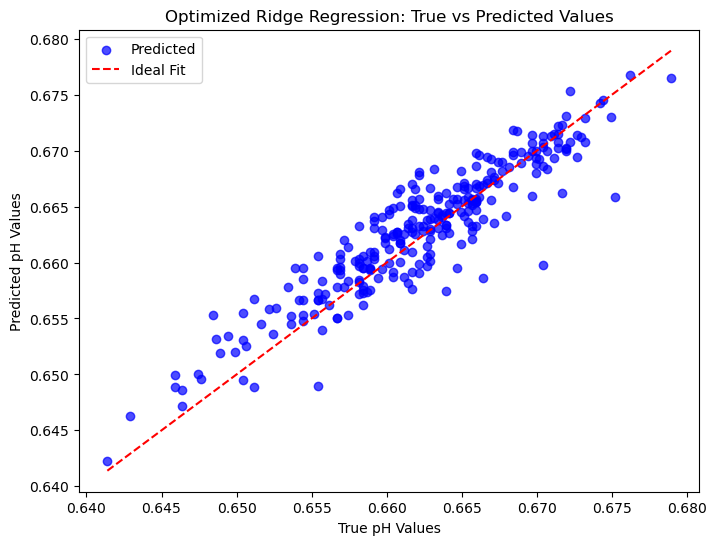

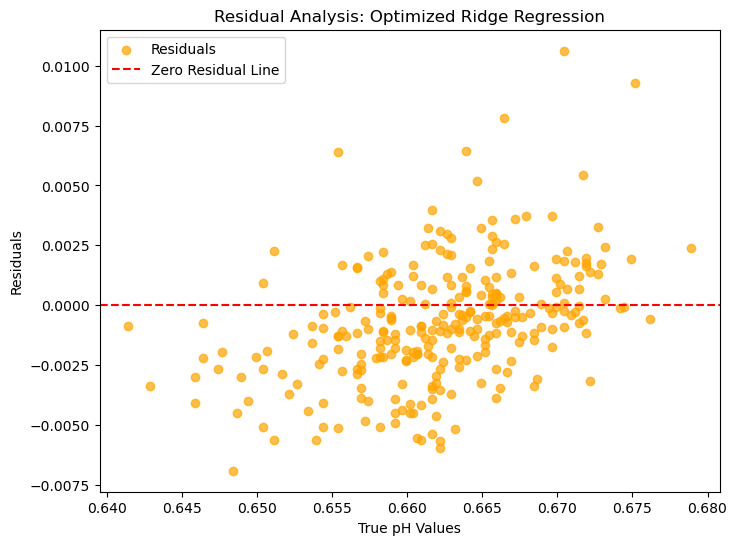

In [20]:
import matplotlib.pyplot as plt

# 1. True vs Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_optimized, alpha=0.7, color="blue", label="Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", label="Ideal Fit")
plt.xlabel("True pH Values")
plt.ylabel("Predicted pH Values")
plt.title("Optimized Ridge Regression: True vs Predicted Values")
plt.legend()
plt.show()

# 2. Residual Analysis
residuals = y_test - y_pred_optimized

plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.7, color="orange", label="Residuals")
plt.axhline(0, color="red", linestyle="--", label="Zero Residual Line")
plt.xlabel("True pH Values")
plt.ylabel("Residuals")
plt.title("Residual Analysis: Optimized Ridge Regression")
plt.legend()
plt.show()


In [21]:
from sklearn.metrics import mean_squared_error

# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred_optimized))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Root Mean Squared Error (RMSE): 0.0026


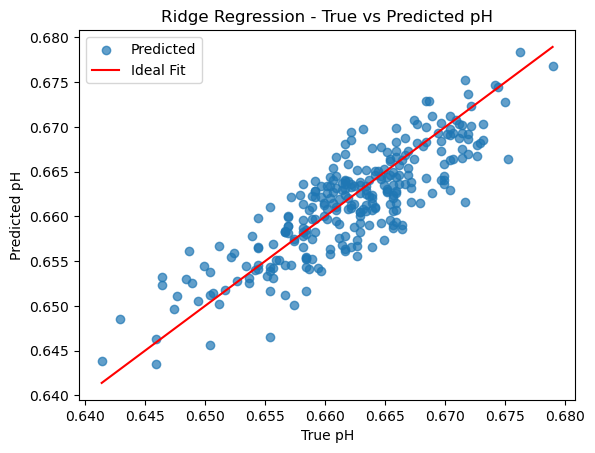

In [22]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_ridge, alpha=0.7, label="Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", label="Ideal Fit")
plt.xlabel("True pH")
plt.ylabel("Predicted pH")
plt.title("Ridge Regression - True vs Predicted pH")
plt.legend()
plt.show()


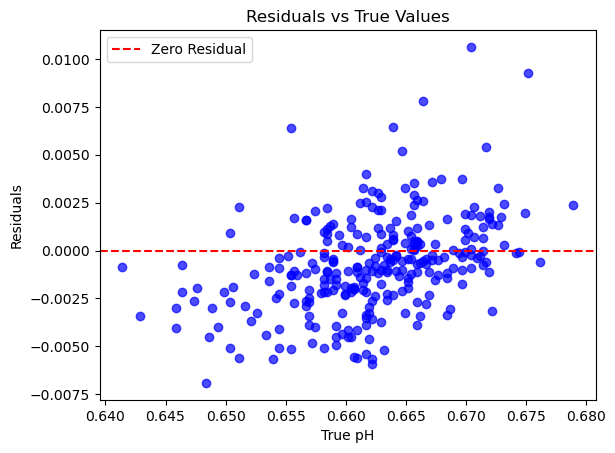

In [23]:
import matplotlib.pyplot as plt

# Residuals
residuals = y_test - y_pred_optimized

# Plot residuals
plt.scatter(y_test, residuals, alpha=0.7, color="blue")
plt.axhline(0, color="red", linestyle="--", label="Zero Residual")
plt.title("Residuals vs True Values")
plt.xlabel("True pH")
plt.ylabel("Residuals")
plt.legend()
plt.show()


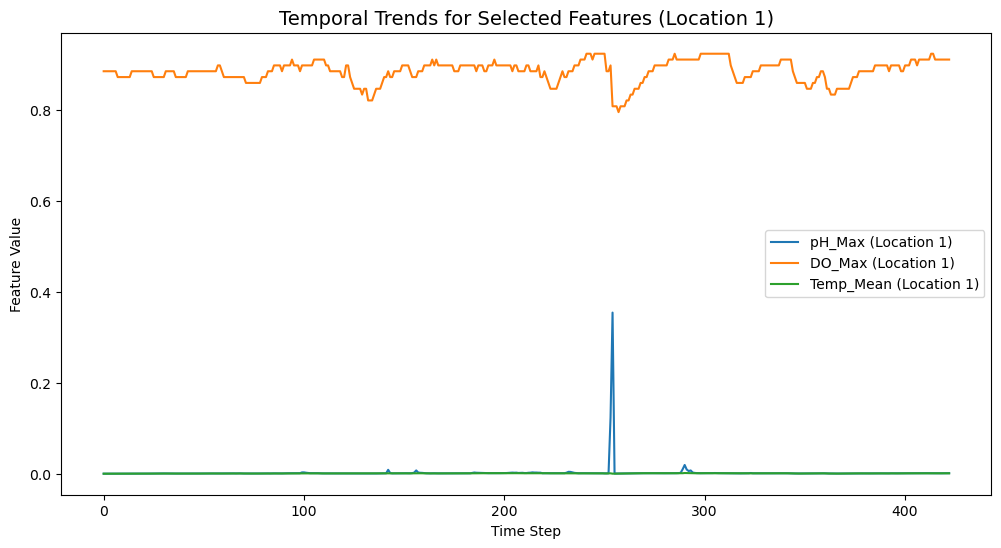

In [24]:
import matplotlib.pyplot as plt

# Example: Assuming X_tr_stacked is in shape (423, 37, 11) and time is along axis 0
time_steps = range(X_tr_stacked.shape[0])  # Assuming 423 time steps
selected_features = ["pH_Max", "DO_Max", "Temp_Mean"]  # Replace with your features

# Plot temporal trends for the first location
plt.figure(figsize=(12, 6))
for i, feature in enumerate(selected_features):
    plt.plot(time_steps, X_tr_stacked[:, 0, i], label=f"{feature} (Location 1)")

plt.title("Temporal Trends for Selected Features (Location 1)", fontsize=14)
plt.xlabel("Time Step")
plt.ylabel("Feature Value")
plt.legend()
plt.show()


In [ ]:
# Example: Spatial variability for the first time step
time_index = 0  # First time step
plt.figure(figsize=(10, 6))

for i, feature in enumerate(selected_features):
    plt.plot(location_ids, X_tr_stacked[time_index, :, i], label=f"{feature}")

plt.title(f"Spatial Variability at Time Step {time_index + 1}", fontsize=14)
plt.xlabel("Location ID")
plt.ylabel("Feature Value")
plt.legend()
plt.show()


In [ ]:
# Compute averages across time for each location
location_averages = X_tr_stacked.mean(axis=0)  # Shape: (37, 11)

# Create a DataFrame for visualization
avg_df = pd.DataFrame(location_averages, columns=features_list, index=location_ids)

# Heatmap of location-wise averages
plt.figure(figsize=(12, 8))
sns.heatmap(avg_df, cmap="viridis", annot=False, cbar=True, linewidths=0.5)
plt.title("Average Feature Values Across Locations", fontsize=14)
plt.xlabel("Features")
plt.ylabel("Locations")
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize data for visualization
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(X_tr_stacked[:, 0, :])  # Normalize for Location 1


In [ ]:
# Plot temporal trends for normalized data
plt.figure(figsize=(12, 6))
for i, feature in enumerate(selected_features):
    plt.plot(time_steps, normalized_data[:, i], label=f"{feature} (Normalized)")

plt.title("Normalized Temporal Trends for Selected Features (Location 1)", fontsize=14)
plt.xlabel("Time Step")
plt.ylabel("Normalized Feature Value")
plt.legend()
plt.show()


In [ ]:
# Pairplot for selected features
selected_features_indices = [features_list.index(f) for f in selected_features]
pairplot_data = pd.DataFrame(X_tr_stacked[:, 0, selected_features_indices], columns=selected_features)

sns.pairplot(pairplot_data, diag_kind="kde", corner=True)
plt.suptitle("Pairwise Feature Relationships (Location 1)", y=1.02, fontsize=16)
plt.show()


In [ ]:
print("Available features:", features_list)


In [ ]:
feature_mapping = {
    'Cond_Max': 'Specific conductance, water, unfiltered, microsiemens per centimeter at 25 degrees Celsius (Maximum)',
    'DO_Max': 'Dissolved oxygen, water, unfiltered, milligrams per liter (Maximum)',
    'Temp_Mean': 'Temperature, water, degrees Celsius (Mean)',
    'pH_Max': 'pH, water, unfiltered, field, standard units (Maximum)',
}


In [ ]:
selected_features = [feature_mapping[f] for f in selected_features if f in feature_mapping]


In [ ]:
selected_features_indices = [features_list.index(f) for f in selected_features]
pairplot_data = pd.DataFrame(X_tr_stacked[:, 0, selected_features_indices], columns=selected_features)

sns.pairplot(pairplot_data, diag_kind="kde", corner=True)
plt.suptitle("Pairwise Feature Relationships (Location 1)", y=1.02, fontsize=16)
plt.show()


In [ ]:
print(f"Number of features in the dataset: {len(features_list)}")
print(f"Number of coefficients in the Ridge model: {len(ridge_model_optimized.coef_)}")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reshape coefficients to match the spatial (37) × feature (11) structure
coefficients_reshaped = ridge_model_optimized.coef_.reshape(37, 11)

# Aggregate the absolute importance of coefficients across all spatial locations
feature_importance = np.sum(np.abs(coefficients_reshaped), axis=0)

# Normalize the feature importance
feature_importance_normalized = feature_importance / feature_importance.sum()

# Map to original feature names
feature_importance_df = pd.DataFrame({
    'Feature': features_list,  # Original feature names
    'Importance': feature_importance_normalized
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Normalized Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Ridge Regression')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


In [ ]:
# Residuals
residuals = y_test - y_pred_optimized

# Scatter plot: Residuals vs True Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.7, color="orange", label="Residuals")
plt.axhline(0, color="red", linestyle="--", label="Zero Residual Line")
plt.xlabel("True pH")
plt.ylabel("Residuals")
plt.title("Residuals vs True Values")
plt.legend()
plt.show()


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = feature_list
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]

print(vif_data)


In [ ]:
# Define the number of locations and features
num_locations = 37
num_features = 11

# Generate feature names
locations = [f"Location_{i+1}" for i in range(num_locations)]
features = [f"Feature_{j+1}" for j in range(num_features)]
feature_list = [f"{loc}_{feat}" for loc in locations for feat in features]

print(f"Feature list length: {len(feature_list)}")
print("Example feature names:", feature_list[:10])


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame to store VIF results
vif_data = pd.DataFrame()
vif_data["Feature"] = feature_list
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]

print(vif_data)


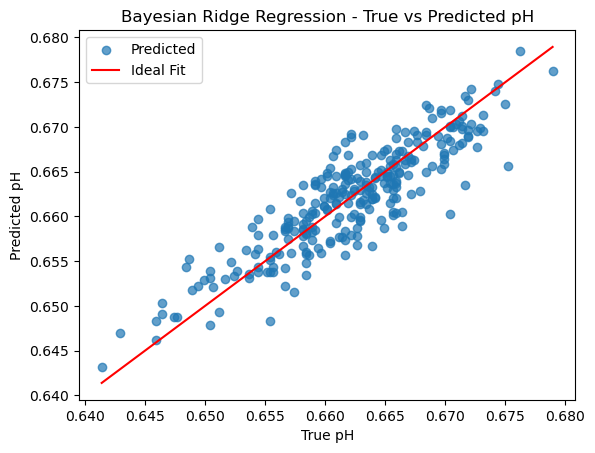

In [25]:
import matplotlib.pyplot as plt

# Scatter plot for Bayesian Ridge
plt.scatter(y_test, y_pred_bayesian_ridge, alpha=0.7, label="Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", label="Ideal Fit")
plt.xlabel("True pH")
plt.ylabel("Predicted pH")
plt.title("Bayesian Ridge Regression - True vs Predicted pH")
plt.legend()
plt.show()


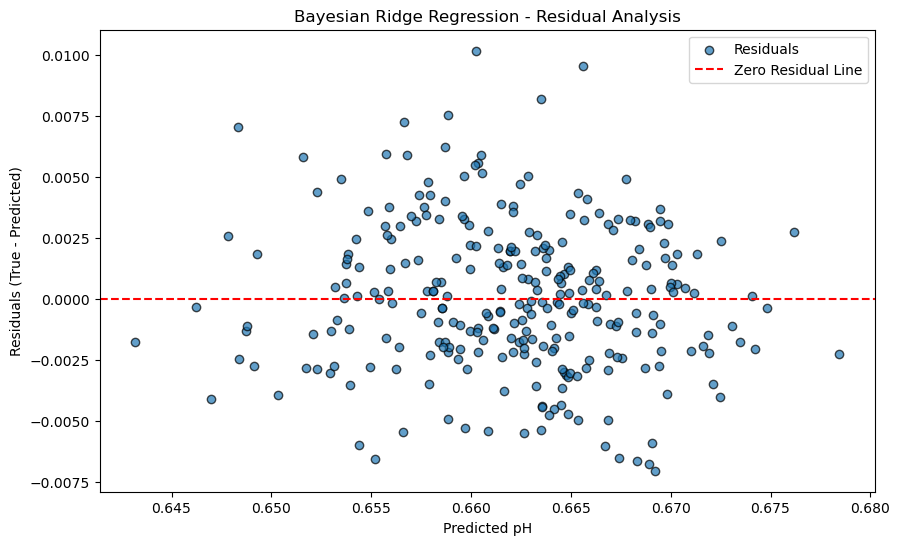

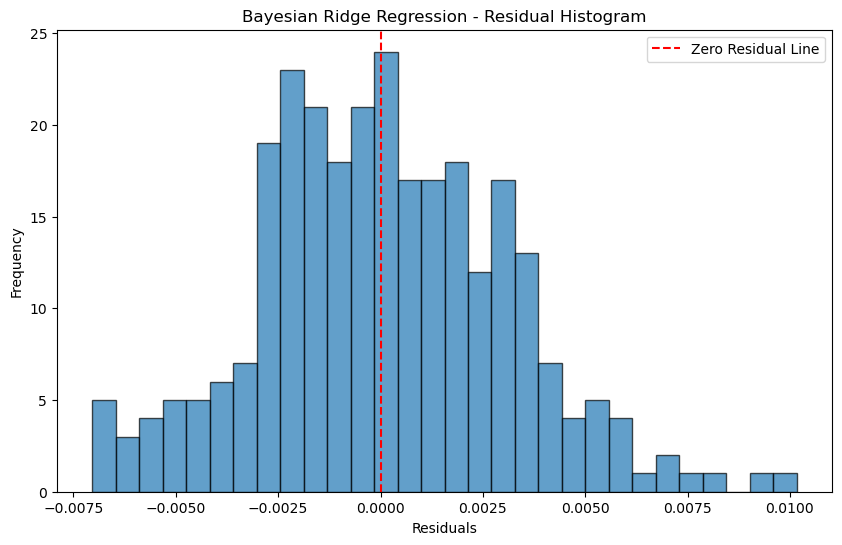

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate residuals
residuals_bayesian = y_test - y_pred_bayesian_ridge

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_bayesian_ridge, residuals_bayesian, alpha=0.7, edgecolor="k", label="Residuals")
plt.axhline(0, color="red", linestyle="--", label="Zero Residual Line")
plt.xlabel("Predicted pH")
plt.ylabel("Residuals (True - Predicted)")
plt.title("Bayesian Ridge Regression - Residual Analysis")
plt.legend()
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals_bayesian, bins=30, alpha=0.7, edgecolor="k")
plt.axvline(0, color="red", linestyle="--", label="Zero Residual Line")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Bayesian Ridge Regression - Residual Histogram")
plt.legend()
plt.show()


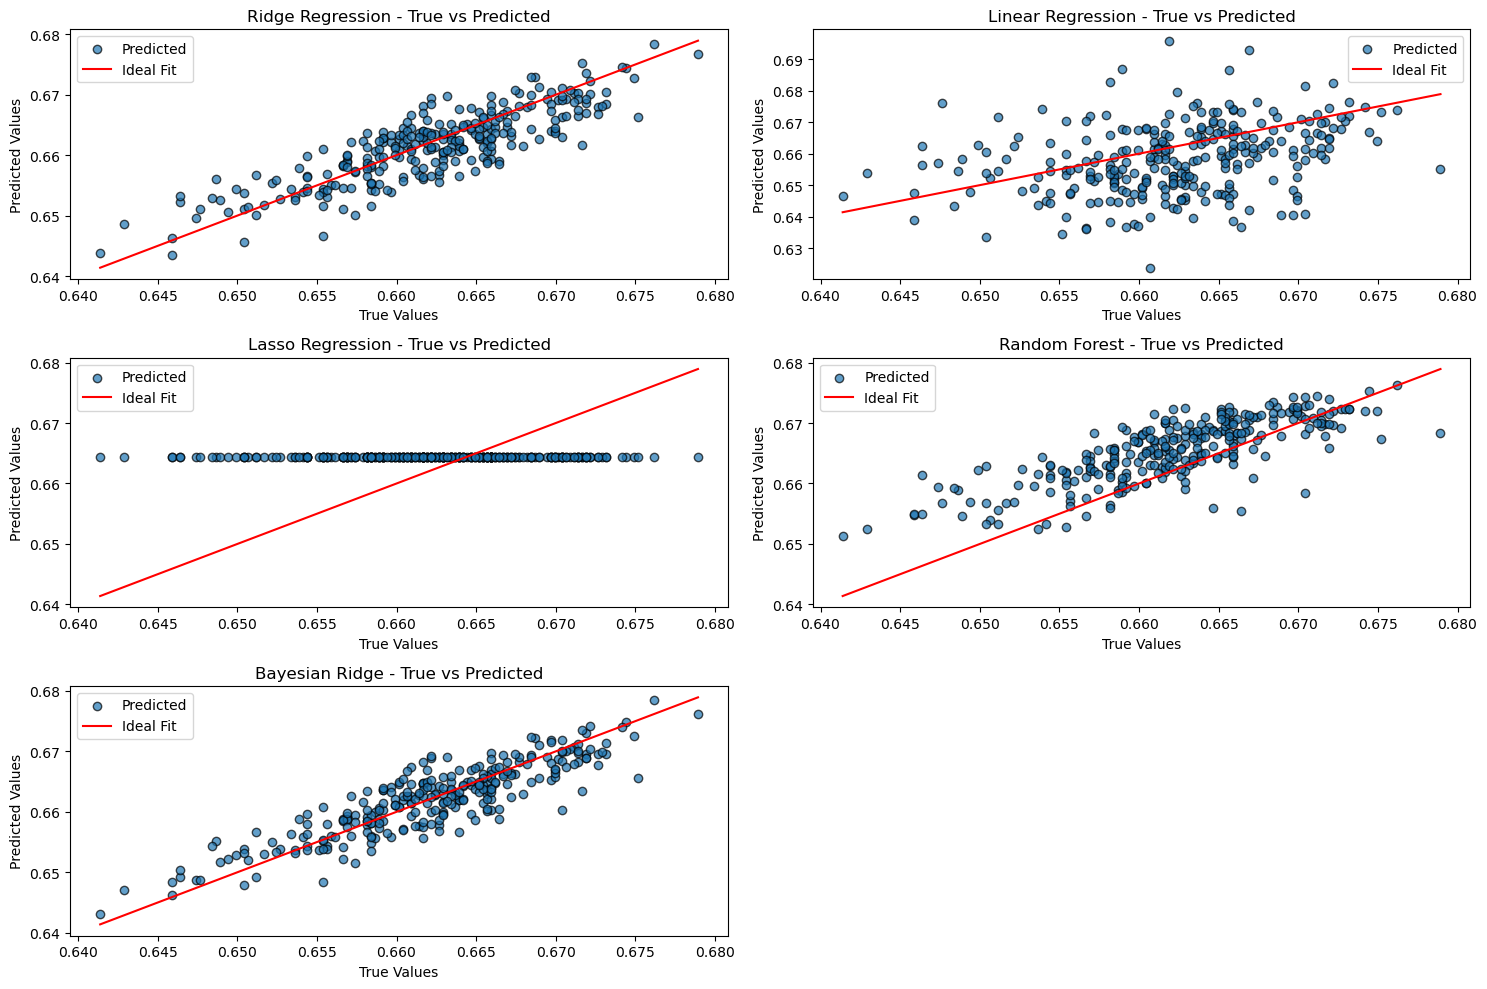

In [27]:
import matplotlib.pyplot as plt

# Define a dictionary for all models and their predictions
models_predictions = {
    "Ridge Regression": y_pred_ridge,
    "Linear Regression": y_pred_linear,
    "Lasso Regression": y_pred_lasso,
    "Random Forest": y_pred_rf,
    "Bayesian Ridge": y_pred_bayesian_ridge
}

# Plot True vs Predicted for each model
plt.figure(figsize=(15, 10))
for i, (model_name, y_pred) in enumerate(models_predictions.items(), 1):
    plt.subplot(3, 2, i)  # Create a grid for subplots
    plt.scatter(y_test, y_pred, alpha=0.7, label="Predicted", edgecolor="k")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", label="Ideal Fit")
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{model_name} - True vs Predicted")
    plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
write a conclusion ablout how bayseain is better
